In [3]:
import sys
print(sys.path)

['c:\\Users\\Maggie\\Documents\\GitHub\\Python-eco\\ipynb', 'C:\\Users\\Maggie\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'C:\\Users\\Maggie\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'C:\\Users\\Maggie\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'C:\\Users\\Maggie\\AppData\\Local\\Programs\\Python\\Python311', 'c:\\Users\\Maggie\\Documents\\GitHub\\Python-eco\\.venv', '', 'c:\\Users\\Maggie\\Documents\\GitHub\\Python-eco\\.venv\\Lib\\site-packages', 'C:\\Users\\Maggie\\Documents\\GitHub\\Python-eco\\module', 'c:\\Users\\Maggie\\Documents\\GitHub\\Python-eco\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\Maggie\\Documents\\GitHub\\Python-eco\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Maggie\\Documents\\GitHub\\Python-eco\\.venv\\Lib\\site-packages\\Pythonwin']


In [4]:
import gamepymain

In [5]:
import site

In [6]:
site.getsitepackages()

['c:\\Users\\Maggie\\Documents\\GitHub\\Python-eco\\.venv',
 'c:\\Users\\Maggie\\Documents\\GitHub\\Python-eco\\.venv\\Lib\\site-packages']

In [7]:
from gamepymain.game import Game, Player

In [ ]:
player_names = 

In [2]:
import os

os.getcwd() # current working directory

'c:\\Users\\Maggie\\Documents\\GitHub\\Python-eco\\ipynb'

In [2]:
import os.path

from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

# If modifying these scopes, delete the file token.json.
SCOPES = ["https://www.googleapis.com/auth/contacts.readonly"]


def main():
  """Shows basic usage of the People API.
  Prints the name of the first 10 connections.
  """
  creds = None
  # The file token.json stores the user's access and refresh tokens, and is
  # created automatically when the authorization flow completes for the first
  # time.
  if os.path.exists("token.json"):
    creds = Credentials.from_authorized_user_file("token.json", SCOPES)
  # If there are no (valid) credentials available, let the user log in.
  if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
      creds.refresh(Request())
    else:
      flow = InstalledAppFlow.from_client_secrets_file(
          "credentials.json", SCOPES
      )
      creds = flow.run_local_server(port=0)
    # Save the credentials for the next run
    with open("token.json", "w") as token:
      token.write(creds.to_json())

  try:
    service = build("people", "v1", credentials=creds)

    # Call the People API
    print("List 10 connection names")
    results = (
        service.people()
        .connections()
        .list(
            resourceName="people/me",
            pageSize=10,
            personFields="names,emailAddresses",
        )
        .execute()
    )
    connections = results.get("connections", [])

    for person in connections:
      names = person.get("names", [])
      if names:
        name = names[0].get("displayName")
        print(name)
  except HttpError as err:
    print(err)


if __name__ == "__main__":
  main()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=5341281298-aavqujjjsqk9pnt8olha0drbe5uc1ptf.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A53836%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcontacts.readonly&state=r9IL83dIGWADeJOYTmNHYBwwc8XQNe&access_type=offline
List 10 connection names
<HttpError 403 when requesting https://people.googleapis.com/v1/people/me/connections?pageSize=10&personFields=names%2CemailAddresses&alt=json returned "People API has not been used in project 5341281298 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/people.googleapis.com/overview?project=5341281298 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry.". Details: "[{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Google developers console API activation', 'url': 'ht

In [263]:
import numpy as np
import random

class AR:
    def __init__(self, phi, Y0):
        self.phi = np.array(phi)
        self.Y0 = np.array(Y0)
        self.memory = np.array([])
        self.YPast = np.array(self.Y0)
    def simulate_onePeriod(self, eps):
        # Simulate one period of ar process
        y_onePeriod_ahead = self.phi@self.YPast + (1-alpha)*eps

        # Update YPast
        self.YPast = np.append(y_onePeriod_ahead, self.YPast[:-1])

        ## append the new element to the memory
        self.memory = np.append(self.memory, y_onePeriod_ahead)
    def simulate_nPeriods(self, n):
        eps = random.choices([0, 0.01], k=n)
        for i in range(n):
            self.simulate_onePeriod(eps[i])

alpha  = 0.33
rho = 0.91
phi = [alpha + rho, -alpha * rho]
ar = AR(phi = phi, Y0=[[0], [0]])

In [264]:
ar.phi, ar.YPast

(array([ 1.24  , -0.3003]),
 array([[0],
        [0]]))

In [265]:
ar.simulate_nPeriods(112)

In [266]:
ar.memory

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0067    , 0.015008  , 0.02329791, 0.02438251, 0.02993795,
       0.02980099, 0.03466286, 0.04073271, 0.0467993 , 0.0524991 ,
       0.05104505, 0.05423039, 0.05191685, 0.04809151, 0.04404284,
       0.04687124, 0.05159428, 0.04990147, 0.05308406, 0.05753882,
       0.055407  , 0.05142577, 0.05382923, 0.05800509, 0.05576139,
       0.0584252 , 0.0624021 , 0.05983352, 0.06215421, 0.06580321,
       0.06963108, 0.07328183, 0.06995926, 0.06474295, 0.05927249,
       0.05405558, 0.05592939, 0.05981955, 0.05738065, 0.05988819,
       0.06372995, 0.06104071, 0.06325238, 0.06680243, 0.06384032,
       0.05910123, 0.05411427, 0.0493536 , 0.04494795, 0.04761457,
       0.0522442 , 0.05718415, 0.06191941, 0.05960767, 0.05531911,
       0.05069552, 0.04625011, 0.04212627, 0.03834767, 0.03490059,
       0.03846093, 0.0372109 , 0.0412917 , 0.04672728, 0.05224193,
       0.05744779, 0.05554701, 0.05162672, 0.04733636, 0.04989

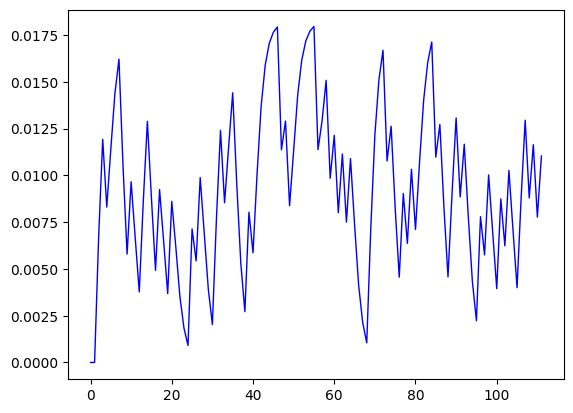

In [262]:
import matplotlib.pyplot as plt

X = ar.memory

plt.plot(X, color="blue", linewidth=1.0, linestyle="-")


In [29]:
n=10
epsilon = random.choices([0, 0.01], k=n)

epsilon

[0, 0.01, 0, 0, 0, 0, 0, 0, 0, 0]

In [288]:
import random
import numpy as np


class AR:
    def __init__(self, phi, epsilon, Y0):
        self.phi = np.array(phi)
        self.epsilon = epsilon
        self.Y0 = np.array(Y0)
        self.memory = np.array([])
        self.YPast = np.array(self.Y0)
    def simulate_onePeriod(self, eps):
        # Simulate one period of ar process
        y_onePeriod_ahead = self.phi@self.YPast + (1-alpha)*eps

        # Update YPast
        self.YPast = np.append(y_onePeriod_ahead, self.YPast[:-1])

        ## append the new element to the memory
        self.memory = np.append(self.memory, y_onePeriod_ahead)
    def simulate_nPeriods(self, n):
        eps = self.epsilon(n)
        for i in range(n):
            self.simulate_onePeriod(eps[i])


def Epsilon(mu, sigma):
    def draw(size):
        return np.random.normal(mu, sigma, size)
    return draw
    
epsilon = Epsilon(0, 0.03)
alpha  = 0.301
rho = 0.934
phi = [alpha + rho, -alpha * rho]
ar = AR(phi = phi, epsilon = epsilon, Y0=[[0], [0]])

In [289]:
ar.phi, ar.YPast

(array([ 1.235   , -0.281134]),
 array([[0],
        [0]]))

In [290]:
ar.simulate_nPeriods(112)

In [280]:
epsilon(112)

array([-0.0370911 , -0.04252587,  0.02503201,  0.01786817,  0.01722061,
        0.00653259,  0.01250905,  0.04049217, -0.03263603,  0.01106921,
        0.03379155,  0.00812389, -0.01524039, -0.0058089 ,  0.009974  ,
        0.01717368, -0.06346837,  0.00192176, -0.00526315, -0.04234476,
       -0.00332606,  0.04609372, -0.05260592,  0.001434  , -0.01250189,
       -0.00918562, -0.00067326, -0.03750059, -0.00907232,  0.00369191,
       -0.01771636,  0.00466844,  0.01469625,  0.0029037 ,  0.01948852,
       -0.01419441,  0.06701718,  0.04073115, -0.0489574 , -0.03770181,
        0.00957525, -0.01187963,  0.01326068,  0.01409382,  0.0261556 ,
        0.01287381, -0.01814439,  0.01942639,  0.0092772 , -0.0020094 ,
        0.03049551,  0.00656132, -0.01261367, -0.03767638, -0.012896  ,
        0.00586352,  0.0133186 ,  0.00528621, -0.02156527, -0.0266139 ,
       -0.03318118, -0.01025754, -0.0018553 , -0.00159206,  0.01122896,
        0.03039134,  0.00788102, -0.04382132, -0.00997934, -0.01

In [291]:
ar.memory

array([ 0.01251124,  0.01024959,  0.01165609,  0.02870307,  0.05966963,
        0.07836715,  0.11382218,  0.14131835,  0.1255988 ,  0.11843542,
        0.14010443,  0.16546118,  0.18331306,  0.16083461,  0.16482152,
        0.17691187,  0.18537531,  0.16528021,  0.13932859,  0.10521866,
        0.0769053 ,  0.0307094 ,  0.00160414, -0.01886154, -0.03505796,
       -0.04567448, -0.00938783, -0.00877497, -0.05800428, -0.11569037,
       -0.13422028, -0.14843261, -0.13877677, -0.12751763, -0.07988021,
       -0.11729504, -0.1091079 , -0.10998779, -0.10342293, -0.07506484,
       -0.03977749, -0.03432232, -0.02072355, -0.04663736, -0.07300366,
       -0.11232294, -0.10725633, -0.13609689, -0.11918337, -0.09726207,
       -0.08856976, -0.02492724,  0.0164958 , -0.00227265, -0.02680608,
       -0.03968348, -0.0160904 , -0.00702519, -0.02746585, -0.05598827,
       -0.04810742, -0.03563949, -0.06584197, -0.0233897 , -0.0154504 ,
        0.00352119, -0.00443412,  0.00453888, -0.0237992 , -0.04

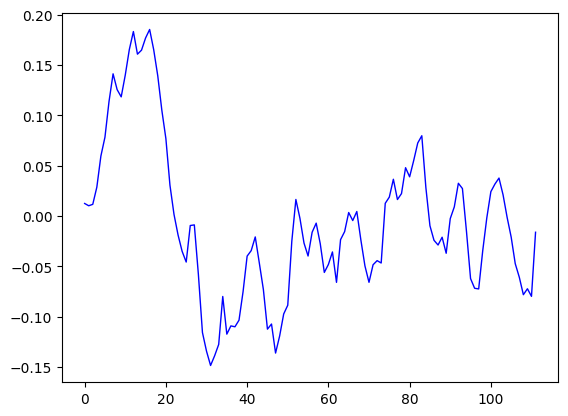

In [292]:
import matplotlib.pyplot as plt

X = ar.memory

plt.plot(X, color="blue", linewidth=1.0, linestyle="-")